In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('freq_gas.npy', 'rb') as f:
    freq = np.load(f)

with open('time_gas.npy', 'rb') as f:
    time = np.load(f)

# Data from gas_transmission.py
We plot the frequency and time from the given file.

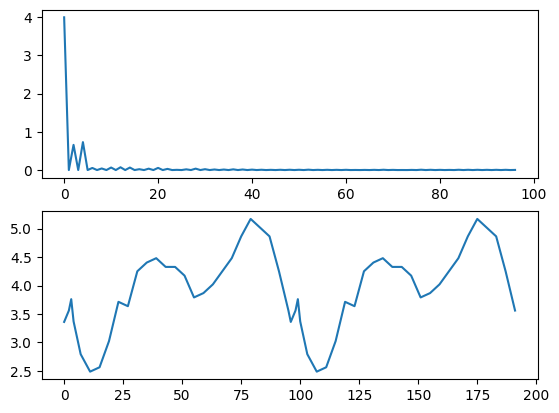

In [4]:
axs = plt.subplot(2, 1, 1)
axs.plot(np.abs(freq))
axs = plt.subplot(2, 1, 2)
axs.plot(time)
plt.show()


We can see that many frequencies are close to zero. 
# Frequency processing
There are only about 3 frequencies that are fairly large, hence we will try to let the rest be equal to 0. It was suggested to only keep the 90% biggest frequencies, but this would only leave one value different from 0 and this is not what is wanted.

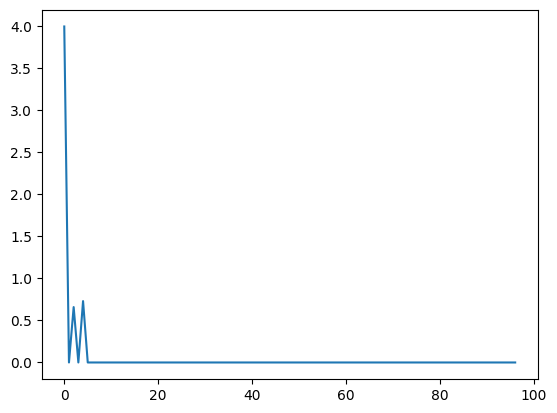

In [6]:
threshold = np.max(np.abs(freq))*0.9
freq[np.abs(freq) < 0.5] = 0

plt.plot(np.abs(freq))
plt.show()

In [10]:
from scipy.fftpack import fft
from scipy.fftpack import ifft

def td2fd(xs):
    # input: N (even) real numbers
    # output: 1 + N // 2 complex numbers (the imaginary part of last number is zero)
    # or
    # input: N (odd) real numbers
    # output: 1 + N // 2 complex numbers (the imaginary part of last number is not zero)
    # complexity: O(n·logn)

    # wrapper
    original_dimension = len(xs.shape)
    if original_dimension < 2:
        xs = xs[np.newaxis, :]

    zs = fft(xs, axis=-1) * (2 / xs.shape[-1])
    zs[:, 0] /= 2
    if xs.shape[-1] % 2 == 0:
        zs[:, xs.shape[-1] // 2] /= 2

    # recover
    if original_dimension == 1:
        return zs[0, :xs.shape[-1] // 2 + 1]

    return zs[:, :xs.shape[-1] // 2 + 1]

def fd2td(zs, is_even=True):
    # input: 1 + N complex numbers (the imaginary part of last number is zero)
    # output: N * 2 (even) real numbers
    # or
    # input: 1 + N complex numbers (the imaginary part of last number is not zero)
    # output: 1 + N * 2 (odd) real numbers
    # complexity: O(n·logn)

    # wrapper
    original_dimension = len(zs.shape)
    if original_dimension < 2:
        zs = zs[np.newaxis, :]

    if is_even:
        zs = np.hstack((zs, np.flip(zs[:, 1:-1].conj(), axis=-1)))  # (N + 1) + (N - 1) = 2N
        zs *= zs.shape[1] / 2
        zs[:, 0] *= 2
        zs[:, zs.shape[1] // 2] *= 2
        xs = ifft(zs, axis=-1).real
    else:
        zs = np.hstack((zs, np.flip(zs[:, 1:].conj(), axis=-1)))  # (N + 1) + N = 2N + 1
        zs *= zs.shape[1] / 2
        zs[:, 0] *= 2
        xs = ifft(zs, axis=-1).real

    return xs[0] if original_dimension == 1 else xs

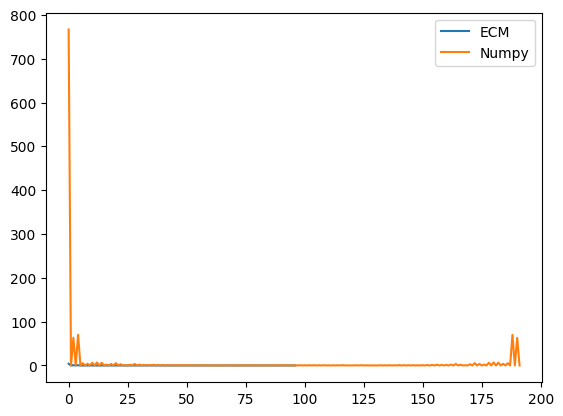

In [25]:
frq = td2fd(time)
frq_np = np.fft.fft(time)
plt.plot(np.abs(frq), label='ECM')
plt.plot(np.abs(frq_np), label='Numpy')
plt.legend()
plt.show()

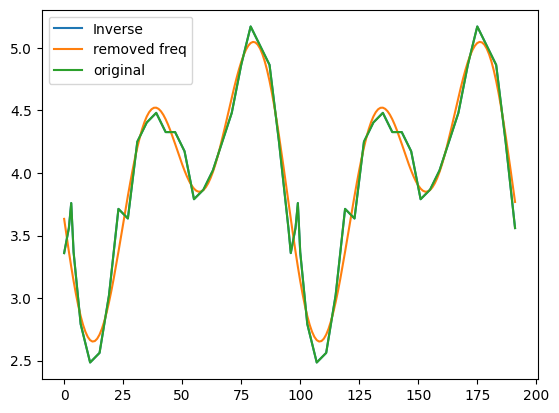

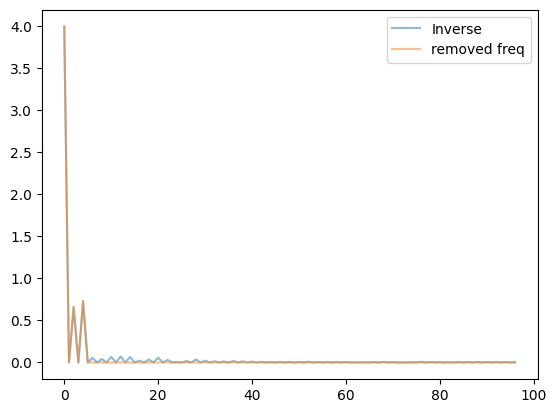

In [21]:
t1 = fd2td(frq)
t2 = fd2td(freq)
plt.plot(t1, label='Inverse')
plt.plot(t2, label='removed freq')
plt.plot(time, label='original')
plt.legend()
plt.show()

plt.plot(np.abs(frq), alpha=0.5, label='Inverse')
plt.plot(np.abs(freq), alpha=0.5, label='removed freq')
plt.legend()
plt.show()
